Thực hành 5: xác định đối tượng trong ảnh

2. Viết chương trình gán nhãn ảnh

2.1 Gán nhãn ảnh

In [ ]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.morphology import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png').convert('L')
a = np.asarray(data)
thres = threshold_otsu(a)
b = a  > thres
c = label (b)
c1 = Image.fromarray(c)
iio.imsave('label_ouput.jpg', c1)
properties = ['Area', 'Centroid', 'BoundingBox']
d = regionprops(c)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(c, cmap='Y10rRd')
for i in d:
    1r, 1c, ur, uc = i['BoundingBox']
    rec_width = uc - 1c
    rec_height = ur -1r
    rect = mpatches.Rectangle((1c, 1r), rec_width, rec_height, fill=False, edgecolor='black', linewidth=2)

2.2 Dò tìm cạnh theo chiều dọc

In [ ]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import lable
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.threshoding import threshold_otsu

data = Image.open('geometric.png').convert('L')
bmg = abs(data - nd.shift(data, (0, 1), order=0))
plt.imshow(bmg)
plt.show

2.3 Dò tìm cạnh với Sobel Filter

In [ ]:
from PIl import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png')
a = nd.sobel(data, axis=0)
b = nd.sobel(data, axis=1)
bmg = abs(a) + abs(b)
plt.imshow(bmg)
plt.show()

2.4 Xác định góc của đối tượng

In [ ]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu
def Harris(indata, alpha=0.2):
    x = nd.sobel(indata, 0)
    y = nd.sobel(indata, 1)
    x1 = x ** 2
    y1 = y ** 2
    xy = abs(x * y)
    x1 = nd.gaussian_filter(x1, 3)
    y1 = nd.gaussian_filter(y1, 3)
    xy = nd.gaussian_filter(xy, 3)
    detC = x1 * y1 - 2 * xy
    trC = x1 + y1
    R = detC - alpha * trC**2
    return R
data = IMage.open('geometric.png')
bmg = Harris(data)
plt.imshow(bmg)
plt.show()
    
    
    




2.5 Dò tìm hình dạng cụ thể trong ảnh với Hough Transform

2.5.1 Dò tìm đường thẳng trong ảnh

In [ ]:
from PIl import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

def LineHough(data, gamma):
    V, H = data.shape
    R = int(np.sqrt(V * V + h * H))
    ho = np .Zeros((R, 90), float) 
    w = data + 0
    ok = 1
    theta = nparange(90)/180 * np.pi
    tp = np.arrange(90).astype(float)
    while ok:
        mx = w.max()
        if mx < gamma:
            ok = 0
        else:
            v, h = divmod(w.argmax(), H)
            y = V - v
            x = h
            rh = x * np.cos(theta) + y * np.sin(theta)
            for i in range(len(rh)) :
                if 0 <= rh(1) < R and 0 <= tp[i] < 90:
                    ho[int(rh[i]), int(tp[i])] += mx
            w[v, h] = 0
    return ho
data = np.zeros((256, 256)) 
data[128, 128] = 1
bmg = LineHough(data, 0.5)
plt.imshow(bmg)
plt.show()             
                       
                    

2.5.2 Dò tìm đường tròn trong ảnh

In [ ]:
from PIl import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches


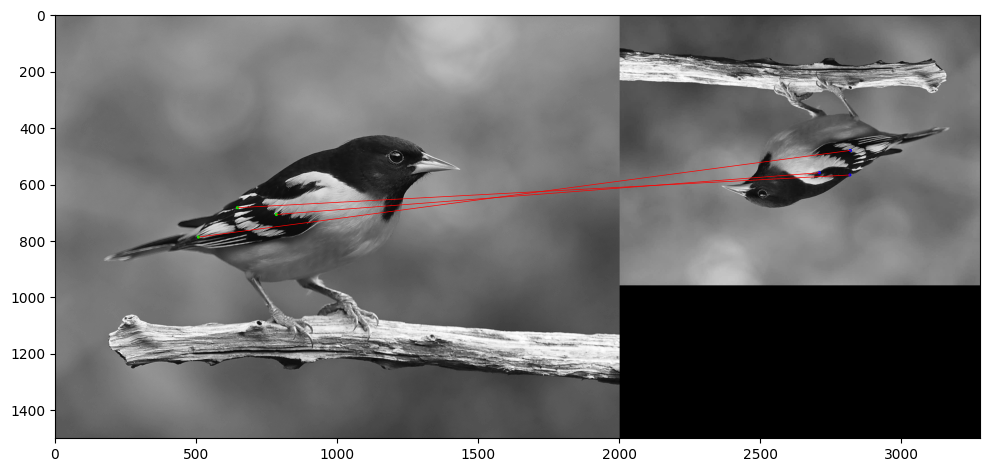

In [ ]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pylab as plt
import matplotlib.patches as mpatches


def harris_corners(img_gray, threshold=0.01):
    img_float = np.float32(img_gray)
    dst = cv2.cornerHarris(img_float, 2, 3, 0.04)
    dst = cv2.dilate(dst, None)
    points = np.argwhere(dst > threshold * dst.max())
    return [tuple(p[::-1]) for p in points]  # (x, y)


def get_patch(img, point, patch_size=11):
    x, y = point
    r = patch_size // 2
    if x - r < 0 or y - r < 0 or x + r >= img.shape[1] or y + r >= img.shape[0]:
        return None
    return img[y - r:y + r + 1, x - r:x + r + 1]


def compute_descriptors(img, keypoints, patch_size=11):
    descriptors = []
    valid_pts = []
    for pt in keypoints:
        patch = get_patch(img, pt, patch_size)
        if patch is not None:
            desc = patch.flatten().astype(np.float32)
            desc = (desc - np.mean(desc)) / (np.std(desc) + 1e-8)
            descriptors.append(desc)
            valid_pts.append(pt)
    return valid_pts, descriptors


def match_descriptors_ratio_test(desc1, pts1, desc2, pts2, ratio=0.75):
    matches = []
    for i, d1 in enumerate(desc1):
        dists = np.linalg.norm(desc2 - d1, axis=1)
        if len(dists) < 2:
            continue
        idx = np.argsort(dists)
        best, second = dists[idx[0]], dists[idx[1]]
        if best / (second + 1e-8) < ratio:
            matches.append((pts1[i], pts2[idx[0]]))
    return matches


img1 = np.array(Image.open('bird.png').convert('L'))
img2 = np.array(Image.open('bird_nguoc.png').convert('L'))

kp1 = harris_corners(img1)
kp2 = harris_corners(img2)

kp1, desc1 = compute_descriptors(img1, kp1)
kp2, desc2 = compute_descriptors(img2, kp2)

desc2_np = np.array(desc2)
matches = match_descriptors_ratio_test(desc1, kp1, desc2_np, kp2, ratio=0.75)

h1, w1 = img1.shape
h2, w2 = img2.shape
canvas = np.zeros((max(h1, h2), w1 + w2), dtype=np.uint8)
canvas[:h1, :w1] = img1
canvas[:h2, w1:] = img2

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(canvas, cmap='gray')

for (x1, y1), (x2, y2) in matches:
    ax.plot([x1, x2 + w1], [y1, y2], 'r-', linewidth=0.5)
    ax.add_patch(mpatches.Circle((x1, y1), radius=3, color='lime', fill=True))
    ax.add_patch(mpatches.Circle((x2 + w1, y2), radius=3, color='blue', fill=True))

plt.tight_layout()
plt.show()
